<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://www.uvv.br/wp-content/themes/uvvBr/templates/assets//img/logouvv.svg" alt="UVV-LOGO" style = width="10px"; height="100px">
        </CENTER>
        <h1 style="font-size:1vw">
        <CENTER><b>CIÊNCIA DE DADOS</b></CENTER>
        <CENTER><b>ANÁLISE DE CLASSIFICAÇÃO</b></CENTER>
  </body>
</html>

**NOME:**

**LINK PARA ESTE NOTEBOOK:** [Aqui!](https://colab.research.google.com/drive/16pyEnfAVsScY27rfrVX-fbtiO_X1IoE4?usp=sharing)

# BIBLIOTECAS E FUNÇÕES

In [ ]:
# Bibliotecas Gerais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from IPython.display import Image

In [ ]:
def separar_train_validation_test(dataset, X_, y_):
  '''
  DOCSTRING:
  dataset: nome do dataset
  X: ['example1', 'example2'] - Entradas descretizadas
  y = ['example'] - alvo
  Faz o processo de criação do dataset X e y para treino,  teste e validação , assim como
  o modelo treinado, testado e validado.

  Return:
  X e y utilizado no treino, teste e validação.
  '''
  classifiers = [DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]
  names = ["Decision Tree", "Random Forest"]

  scores = []

  # Separar: [X]
  X = dataset[X_]

  # Transformando Pandas Series em ndArray
  X = np.array(X)

  #Separa [y]
  y = dataset[y_]

  # Transformando Pandas Series em ndArray
  y = np.array(y)

  # Modelo Escolhido: Training 60%, Validation 20% e Test 20%
  X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)

  # Cross Validation
  for i in range(10):
    # Treinamento = 60% + (Validação + Teste) = 40%
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=.3, shuffle = True)

    print(f'-------------------------\nCross Validation {i + 1}')

    i = 1
    for name, clf in zip(names, classifiers):
      # Treinamento: Ajuste dos modelos
      clf.fit(X_train, y_train.ravel())
      # Teste: score
      score = clf.score(X_validation, y_validation)
      print(f'Classifier {i}: The accuracy of {name} is: {score * 100:.3f} %')
      i += 1

      scores.append(round(score*100, 3))

  _tmp = []
  for i in range(0, len(scores), 2):
    _tmp.append(scores[i])
    scores_1 = pd.DataFrame(data=_tmp, columns=['Score'])

  _tmp = []
  for i in range(1, len(scores), 2):
    _tmp.append(scores[i])
    scores_2 = pd.DataFrame(data=_tmp, columns=['Score'])


  return  scores_1,scores_2 , X_train_validation, X_test, y_train_validation, y_test, y, X, X_train, X_validation, y_train, y_validation

In [ ]:
def matriz_confusao_e_score(classificador, X_train, y_train, X_validation, y_validation, X_test, y_test):
  '''
  DOCSTRING:
  classificador - objeto classificador
  X_train, y_train, X_validation, y_validation, X_test, y_test

  Return:
  Score de treino, validação e teste. Matriz de confusão.
  '''

  classifier1 = classificador
  mdl1 = classifier1.fit(X_train, y_train)

  y_train_pred = mdl1.predict(X_train)
  print('Matriz de Confusão')
  print(confusion_matrix(y_train, y_train_pred))

  print('\nScore de Treinamento')
  score_1 = mdl1.score(X_train, y_train)
  print(f'The accuracy is: {score_1 * 100:.3f} %')

  print('\nScore de Validação')
  score_2 = mdl1.score(X_validation, y_validation)
  print(f'The accuracy is: {score_2 * 100:.3f} %')

  print('\nScore de Teste')
  score_3 = mdl1.score(X_test, y_test)
  print(f'The accuracy is: {score_3 * 100:.3f} %')

In [ ]:
#Discretização
def criar_dicionario_discretizado():
  '''
  DOCSTRING:
  Cria 3 dicionarios, cada uma com a relação 'Qualitativa' X 'Discretizada' correspondente
  Ela será utilizada apenas nos exercicios em que a discretização já for feita,
  pois, há outra função que faz a discretização e cria a tabela com a relação.
  '''


  # MAPEAMENTO:
  regiao = {1: 'SUDESTE', 2: 'CENTRO-OESTE', 3: 'NORDESTE', 4: 'NORTE', 5: 'SUL'}
  # regiao = [1, 2, 3, 4, 5]
  sexo = {1: 'MASCULINO', 2: 'FEMININO'}
  #sexo = [1, 2]
  dia = {1: 'SEXTA-FEIRA', 2: 'SÁBADO', 3: 'DOMINGO'}
  #dia = [1, 2, 3]

  return regiao, sexo, dia


In [ ]:
def questao2():

  """
  DOCSTRING:
  Faz uma previsão utilizando o modelo do Decision Tree
  Utiliza um dicionario da relação 'Qualitativa' e 'Discretizada' criada na função 'criar_dicionario_discretizado'

  Return:
  Faz o print dos valores gerados de X e a previsão de y do modelo supracitado.
  """

  i = 0
  while True:

    option = int(input('1 - Prever, 0 - Parar\nSua Opção: '))
    if option == 0:
      print('\nEncerrando...\nPronto!')
      break
    if option == 1:
      i+=1
      # Amostra nova por Simulação: sample [x0,	x1,	x2,	x3]


      x0 = round(int(np.random.randint(1, 6, 1)[0]),2)
      x1 = round(int(np.random.randint(1, 3, 1)[0]),2)
      x3 = round(int(np.random.randint(1, 4, 1)[0]),2)
      x4 = round(np.random.normal(X[:, 3].mean(), X[:, 3].std(), 1)[0], 1)
      x5 = round(np.random.normal(X[:, 4].mean(), X[:, 4].std(), 1)[0], 2)

      #Tratamento de erros
      if x0 <0:
        x0 = -x0
      if x3 <0:
        x3 = -x3
      if x4 <0:
        x4 = -x4
      if x5 <0:
        x5 = -x5

      # Amostra nova por Simulação: sample1
      sample = np.array([x0, x1, x3, x4, x5])

      # Amostra nova: sample1 aplicar ao Modelo Linear

      treinado = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train.ravel())
      y = treinado.predict(sample.reshape(1, -1))
      y_estimado = y[0]
      # Voltando Discretização

      regiao, sexo, dia = criar_dicionario_discretizado()

      regiao_ = regiao[x0]
      sexo_ = sexo[x1]
      dia_ = dia[x3]

      #Print
      print("\n---------------------------------")
      print(f"Cliente {i}")
      display(Image(f'customer{y_estimado}.png'))

      print(f"Região: {regiao_}\nSexo: {sexo_}\nDia: {dia_}\nSalário Bruto: {x4: .2f}\nValor gasto: {x5: .2f}")
      print(f'Grupo estimado {y_estimado:}\n')

    else:
      print('Opção não dispónivel')
      break

In [ ]:
def plot_Decision_Tree():
  '''
  DOCSTRING: return lineplot dos Scores por N - Numero de vezes treinado
  '''

  ax = sns.lineplot(data=scores_1, y=scores_1['Score'], x=list(scores_1.index))
  ax.set_title('Scores Modelo Desicion Tree por numero de validação')
  ax.set_xlabel('Validação')
  ax.plot(8.3, scores_1.Score.mean(), "D", label="MÉDIA:  $\\overline{\mu}$ =" + str(round(scores_1.Score.mean(), 3)))
  plt.legend()

In [ ]:
def plot_Random_Forest():
  '''
  DOCSTRING: return lineplot dos Scores por N - Numero de vezes treinado
  '''

  ax = sns.lineplot(data=scores_2, y=scores_2['Score'], x=list(scores_1.index))
  ax.set_title('Scores Modelo Random Forest por numero de validação')
  ax.set_xlabel('Validação')
  ax.plot(8.5, scores_2.Score.mean(), "D", label="MÉDIA:  $\\overline{\mu}$ =" + str(round(scores_2.Score.mean(), 3)))
  plt.legend()

LOAD: Sua tabela: [table](https://drive.google.com/file/d/1-BP0zH0EQuPK98Vql5QZ-Glyu3wPRDcJ/view?usp=sharing)

In [ ]:
# LOAD DO DATASET
dataset = pd.read_csv('/content/table.csv', index_col = 0)
dataset = dataset.drop(['CÓDIGO'], axis=1)
dataset.head(3)

,REGIÃO,SEXO,DEPENDENTES,SALÁRIO BRUTO (R$),TOTAL DE GASTOS (R$),PERFIL
0,4,2,0,18118.47,13045.30,3
1,1,1,1,1440.71,1037.31,1
2,2,1,1,1351.58,973.14,2


FAÇA:
*   Para seu dataset: TABLE, estabeleça os **DATASETS: TRAIN - VALIDATION - TEST**, conforme a seguir, a seu critério;
*   Escolha uma das proporções abaixo.

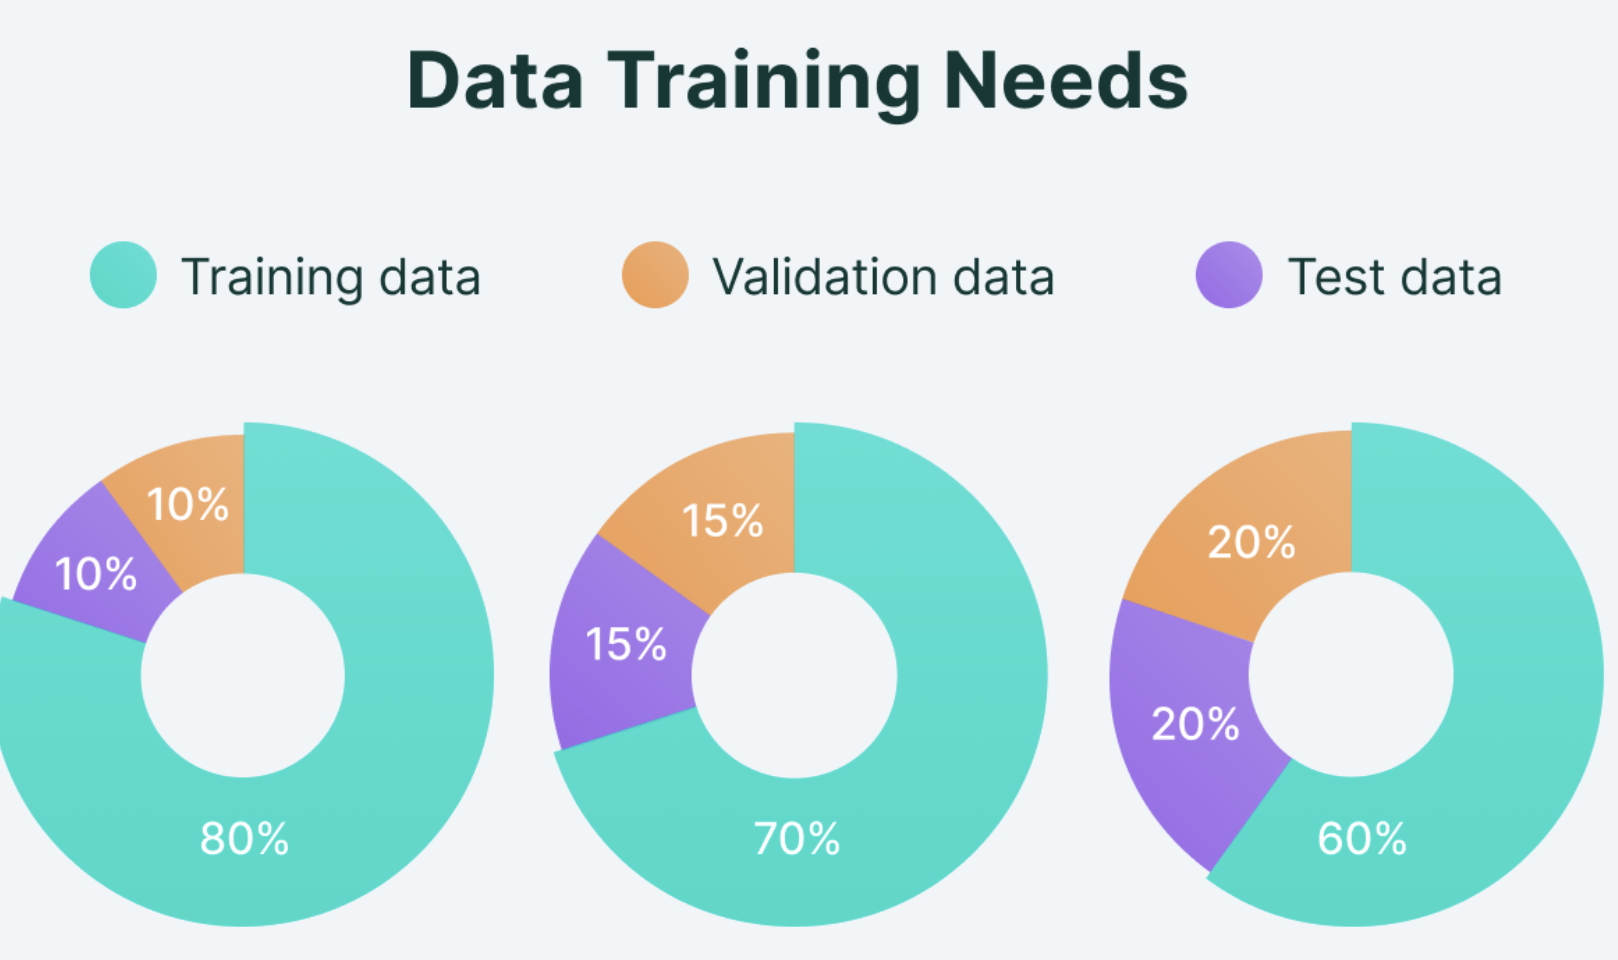

#Questão 1:

Faça o relatório gráfico do SCORE x $n$, por Validação Cruzada de dados, dos dois(2) MODELOS DE CLASSIFICAÇÃO sorteados na PAUTA.

Você deve repetir a divisão (split: **TRAIN - VALIDATION - TEST**) $n$ vezes para validar os resultados obtendo a MENOR variabilidade possível entre os SCORES dos conjuntos CROSS VALIDADOS.

In [ ]:
#n = 10
#Classificadores - Decision Tree e Random Forest
scores_1, scores_2, X_train_validation, X_test, y_train_validation, y_test, y, X, X_train, X_validation, y_train, y_validation = separar_train_validation_test(dataset, ['REGIÃO',	'SEXO',	'DEPENDENTES',	'SALÁRIO BRUTO (R$)',	'TOTAL DE GASTOS (R$)'], ['PERFIL'])

-------------------------
Cross Validation 1
Classifier 1: The accuracy of Decision Tree is: 90.040 %
Classifier 2: The accuracy of Random Forest is: 89.983 %
-------------------------
Cross Validation 2
Classifier 1: The accuracy of Decision Tree is: 90.059 %
Classifier 2: The accuracy of Random Forest is: 90.051 %
-------------------------
Cross Validation 3
Classifier 1: The accuracy of Decision Tree is: 89.899 %
Classifier 2: The accuracy of Random Forest is: 89.846 %
-------------------------
Cross Validation 4
Classifier 1: The accuracy of Decision Tree is: 89.958 %
Classifier 2: The accuracy of Random Forest is: 89.931 %
-------------------------
Cross Validation 5
Classifier 1: The accuracy of Decision Tree is: 90.011 %
Classifier 2: The accuracy of Random Forest is: 90.017 %
-------------------------
Cross Validation 6
Classifier 1: The accuracy of Decision Tree is: 90.147 %
Classifier 2: The accuracy of Random Forest is: 90.154 %
-------------------------
Cross Validation 7
C

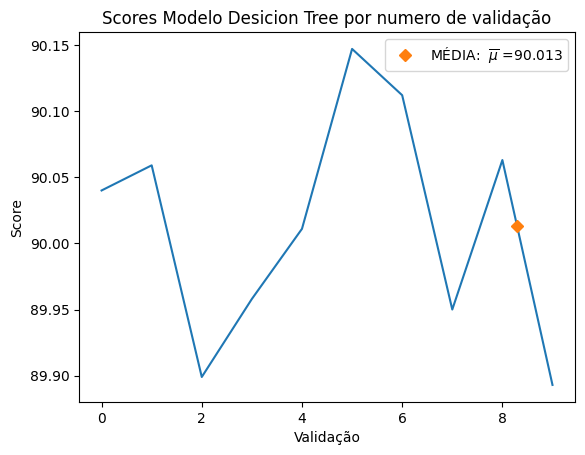

In [ ]:
plot_Decision_Tree()

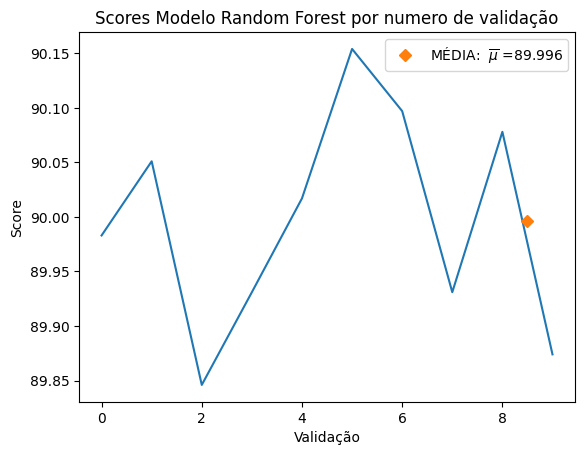

In [ ]:
plot_Random_Forest()

##Extra - Matrix de Confusão e Score

In [ ]:
matriz_confusao_e_score(DecisionTreeClassifier(max_depth=5), X_train, y_train, X_validation, y_validation, X_test, y_test)

Matriz de Confusão
[[71265  2280     0]
 [ 9747 24330     0]
 [    0     0 14878]]

Score de Treinamento
The accuracy is: 90.182 %

Score de Validação
The accuracy is: 89.893 %

Score de Teste
The accuracy is: 90.121 %


In [ ]:
matriz_confusao_e_score(RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), X_train, y_train.ravel(), X_validation, y_validation.ravel(), X_test, y_test.ravel())

Matriz de Confusão
[[71616  1929     0]
 [10131 23946     0]
 [    0     0 14878]]

Score de Treinamento
The accuracy is: 90.155 %

Score de Validação
The accuracy is: 89.865 %

Score de Teste
The accuracy is: 90.060 %


#Questão 2:

Faça simulação / rediscretização dos dados para amostras criadas aleatoriamente, conforme o exemplo do material:

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 1


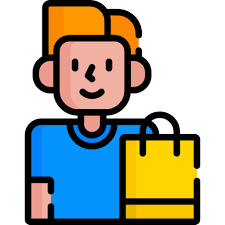

Região: NORTE
Sexo: MASCULINO
Dia: DOMINGO
Salário Bruto:  161.70
Valor gasto:  5071.86
Grupo estimado 1

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 2


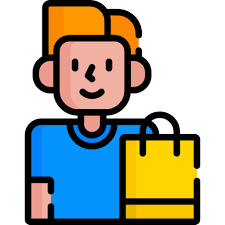

Região: CENTRO-OESTE
Sexo: FEMININO
Dia: SÁBADO
Salário Bruto:  448.30
Valor gasto:  1956.73
Grupo estimado 1

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 3


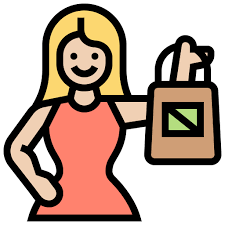

Região: NORDESTE
Sexo: FEMININO
Dia: SEXTA-FEIRA
Salário Bruto:  9604.00
Valor gasto:  2151.84
Grupo estimado 3

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 4


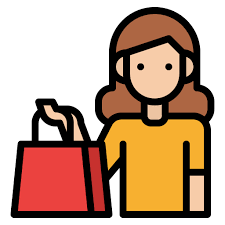

Região: SUDESTE
Sexo: FEMININO
Dia: DOMINGO
Salário Bruto:  3780.00
Valor gasto:  2818.34
Grupo estimado 2

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 5


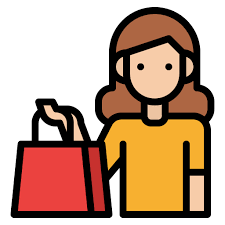

Região: NORTE
Sexo: FEMININO
Dia: DOMINGO
Salário Bruto:  2720.30
Valor gasto:  408.73
Grupo estimado 2

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 6


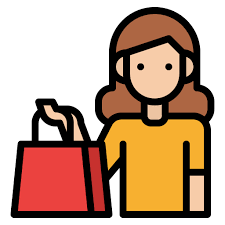

Região: CENTRO-OESTE
Sexo: FEMININO
Dia: SÁBADO
Salário Bruto:  12377.60
Valor gasto:  5515.68
Grupo estimado 2

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 7


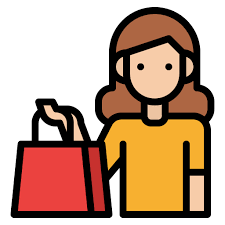

Região: SUL
Sexo: MASCULINO
Dia: SÁBADO
Salário Bruto:  4214.60
Valor gasto:  13525.09
Grupo estimado 2

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 8


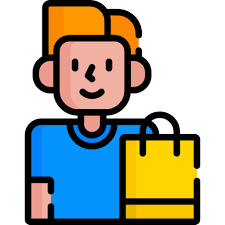

Região: SUL
Sexo: MASCULINO
Dia: DOMINGO
Salário Bruto:  262.60
Valor gasto:  1626.97
Grupo estimado 1

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 9


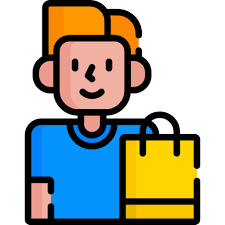

Região: NORTE
Sexo: MASCULINO
Dia: SEXTA-FEIRA
Salário Bruto:  539.00
Valor gasto:  1229.48
Grupo estimado 1

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 10


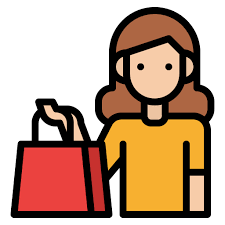

Região: SUDESTE
Sexo: FEMININO
Dia: SÁBADO
Salário Bruto:  5586.80
Valor gasto:  6075.10
Grupo estimado 2

1 - Prever, 0 - Parar
Sua Opção: 0

Encerrando...
Pronto!


In [ ]:
questao2()

#CONCLUSÕES:


1.  Os classificadores Decision Tree e Random Forest tem desempenhos similares, uma vez que o Random Forest é criado a partir de diversas Decision Trees.
2.   O Classificador Desicion Tree tem um desempenho ligeramente melhor que o Random Forest, errando menos como é possivel ver no Score e Matriz de Confunsão.
3. Os dois algoritimos acertam 100% dos clientes do tipo 3, porém confundem o 1 e o 2, principalmente pensando errando o 2.

PARA ENTREGAR: Coverter seu YPYNB para PDF:

In [ ]:
#%%shell
#jupyter nbconvert --to html /content/TRABALHO_Análise_de_Classificação.ipynb

[NbConvertApp] Converting notebook /content/TRABALHO_Análise_de_Classificação.ipynb to html
[NbConvertApp] Writing 1278645 bytes to /content/TRABALHO_Análise_de_Classificação.html
